In [0]:

# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 6.6MB/s 


KeyboardInterrupt: ignored

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls

adc.json	   log_svm.csv	 sub3_LSTM.csv	sub6_CnnGRU.csv
drive		   sample_data	 sub4_BGRU.csv	sub7_GruCNN.csv
ensemble_mode.csv  sub2_GRU.csv  sub5_CNN.csv


In [0]:
!ls '/content/drive/My Drive/AV_data/Innoplexus_25thJuly_2019'

# C:\Users\KONINSH1.APNET\OneDrive - Novartis Pharma AG\AV_data\Decipher_Women_20th_July_2019

 crawl-300d-2M.vec.zip		'Problem Statement.docx'
 glove.twitter.27B.25d.txt.zip	 sample_submission_i5xnIZD.csv
 models				 test_tOlRoBf.csv
'~$oblem Statement.docx'	 train_F3WbcTw.csv


### Load Packages

In [0]:
# imports
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Read the datasets

In [0]:
file = r'/content/drive/My Drive/AV_data/Innoplexus_25thJuly_2019/'
sub_df = pd.read_csv(file+'sample_submission_i5xnIZD.csv')


In [0]:
sub_df.head(3)

,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,0
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,0
2,50b6d851bcff4f35afe354937949e9948975adf7,0


In [0]:
sub_df.shape

(2924, 2)

In [0]:
file = r'/content/drive/My Drive/AV_data/Innoplexus_25thJuly_2019/'
train_df = pd.read_csv(file+'train_F3WbcTw.csv', encoding='latin-1')

In [0]:
train_df.head(3)

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why youâd want t...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2


In [0]:
file = r'/content/drive/My Drive/AV_data/Innoplexus_25thJuly_2019/'
test_df = pd.read_csv(file+'test_tOlRoBf.csv')

In [0]:
test_df.head(2)

,unique_hash,text,drug
0,9e9a8166b84114aca147bf409f6f956635034c08,"256 (previously stable on natalizumab), with 5...",fingolimod
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,On fingolimod and have been since December 201...,fingolimod


In [0]:
print(f'Number of samples in train: {train_df.shape[0]}')
print(f'Number of columns in train: {train_df.shape[1]}')
for col in train_df.columns:
    if train_df[col].isnull().any():
        print(col, train_df[col].isnull().sum())

Number of samples in train: 5279
Number of columns in train: 4


In [0]:
print(f'Number of samples in test: {test_df.shape[0]}')
print(f'Number of columns in test: {test_df.shape[1]}')
for col in test_df.columns:
    if test_df[col].isnull().any():
        print(col, test_df[col].isnull().sum())

Number of samples in test: 2924
Number of columns in test: 3


In [0]:
train_df.dtypes

unique_hash    object
text           object
drug           object
sentiment       int64
dtype: object

In [0]:
# Check if there is any shift between the NAME in train and test
## Get the unique unique_hash in trian and test set
uniq_users_train = np.array(train_df['unique_hash'].unique().tolist())
uniq_users_train

print('The total number of unique_hash from train are :', uniq_users_train.size)

uniq_users_test = np.array(test_df['unique_hash'].unique().tolist())
uniq_users_test
print('The total number of  unique_hash from test are :', uniq_users_test.size)

## Get the common number of unique_hash between train and test
common_users = (np.intersect1d(uniq_users_train, uniq_users_test))
print('The total number of common users are :',common_users.size)

The total number of unique_hash from train are : 5279
The total number of  unique_hash from test are : 2924
The total number of common users are : 0


In [0]:
print(train_df.shape)
print(test_df.shape)

(5279, 4)
(2924, 3)


In [0]:
train_df.isnull().sum()

unique_hash    0
text           0
drug           0
sentiment      0
dtype: int64

In [0]:
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count


In [0]:
missing_df['column_name'].values

array([], dtype=object)

In [0]:
dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,1
1,object,3


In [0]:
unique_df = train_df.nunique().reset_index()
unique_df.columns = ["col_name", "unique_count"]
constant_df = unique_df[unique_df["unique_count"]==1]
constant_df.shape

(0, 2)

In [0]:
str(constant_df.col_name.tolist())

'[]'

In [0]:
train_df['sentiment'].value_counts()

2    3825
1     837
0     617
Name: sentiment, dtype: int64

In [0]:
train_df.columns

Index(['unique_hash', 'text', 'drug', 'sentiment'], dtype='object')

In [0]:
class_count = train_df['sentiment'].value_counts()
class_count

2    3825
1     837
0     617
Name: sentiment, dtype: int64

The sentiment labels are:
0 - positive 1 - negative, 2-neutral



Text(0, 0.5, 'Number of reviews ')

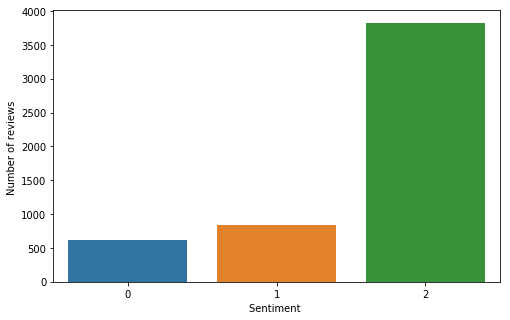

In [0]:
x = np.array(class_count.index)
y = np.array(class_count.values)
plt.figure(figsize=(8,5))
sns.barplot(x,y)
plt.xlabel('Sentiment ')
plt.ylabel('Number of reviews ')

In [0]:
print('Number of sentences in training set:',len(train_df['text'].unique()))
print('Number of sentences in test set:',len(test_df['text'].unique()))
print('Average words per drug in train:',train_df.groupby('drug')['text'].count().mean())
print('Average words per drug in test:',test_df.groupby('drug')['text'].count().mean())

Number of sentences in training set: 5181
Number of sentences in test set: 2721
Average words per drug in train: 51.754901960784316
Average words per drug in test: 30.778947368421054


Using Word Clouds to see the higher fequency words from each sentiment

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(10, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

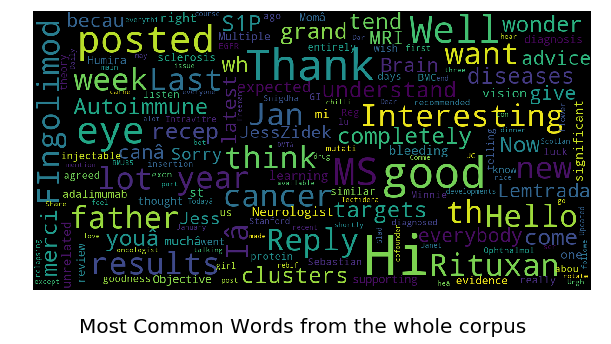

In [0]:
show_wordcloud(train_df['text'],'Most Common Words from the whole corpus')

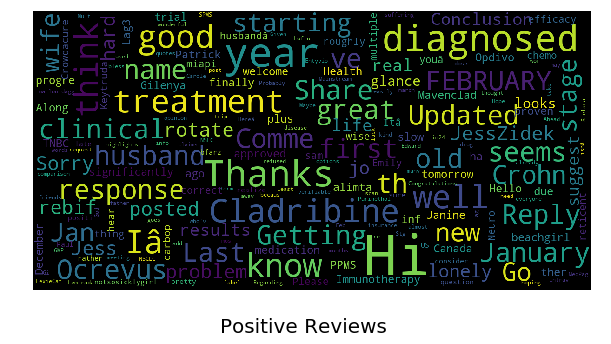

In [0]:
show_wordcloud(train_df[train_df['sentiment'] == 0]['text'],'Positive Reviews')

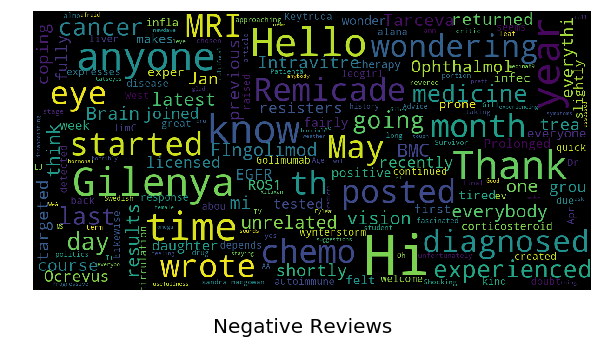

In [0]:
show_wordcloud(train_df[train_df['sentiment'] == 1]['text'],'Negative Reviews')

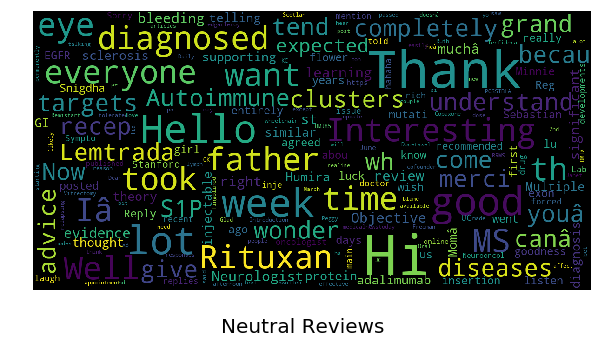

In [0]:
show_wordcloud(train_df[train_df['sentiment'] == 2]['text'],'Neutral Reviews')

In [0]:
train_df['text'] = train_df['text'].str.replace("[^a-zA-Z]", " ")
test_df['text'] = test_df['text'].str.replace("[^a-zA-Z]", " ")

In [0]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords 
stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
# tokenization 
train_tokenized_doc = train_df['text'].apply(lambda x: x.split())

# remove stop-words 
train_tokenized_doc = train_tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# tokenization 
test_tokenized_doc = test_df['text'].apply(lambda x: x.split())


In [0]:
# de-tokenization 
detokenized_doc = [] 
for i in range(len(train_df)): 
    try:
      t = ' '.join(train_tokenized_doc[i]) 
      detokenized_doc.append(t) 
    except:
      pass

train_df['text'] = detokenized_doc

# de-tokenization 
detokenized_doc = [] 
for i in range(len(test_df)): 
  try:
    t = ' '.join(test_tokenized_doc[i]) 
    detokenized_doc.append(t) 
  except:
    pass
    

test_df['text'] = detokenized_doc

### Different Machine Learning Models

In [0]:
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
tokenizer = TweetTokenizer()

#### 1.N-Grams

In [0]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3), tokenizer=tokenizer.tokenize)
full_text = list(train_df['text'].values) + list(test_df['text'].values)
vectorizer.fit(full_text)
train_vectorized = vectorizer.transform(train_df['text'])
test_vectorized = vectorizer.transform(test_df['text'])

In [0]:
y = train_df['sentiment']

In [0]:
from sklearn.model_selection import train_test_split
x_train , x_val, y_train , y_val = train_test_split(train_vectorized,y,test_size = 0.2)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.multiclass import OneVsRestClassifier

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### Training Logistic Reagression model and an SVM.

In [0]:
lr = LogisticRegression()
ovr = OneVsRestClassifier(lr)
ovr.fit(x_train,y_train)
print(classification_report( ovr.predict(x_val) , y_val))
print(accuracy_score( ovr.predict(x_val) , y_val ))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      0.73      0.84      1056

    accuracy                           0.73      1056
   macro avg       0.33      0.24      0.28      1056
weighted avg       1.00      0.73      0.84      1056

0.7253787878787878


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
svm = LinearSVC()
svm.fit(x_train,y_train)
print(classification_report( svm.predict(x_val) , y_val))
print(accuracy_score( svm.predict(x_val) , y_val ))

              precision    recall  f1-score   support

           0       0.06      0.70      0.10        10
           1       0.01      0.22      0.02         9
           2       0.99      0.73      0.84      1037

    accuracy                           0.73      1056
   macro avg       0.35      0.55      0.32      1056
weighted avg       0.97      0.73      0.83      1056

0.7253787878787878


In [0]:
estimators = [ ('svm',svm) , ('ovr' , ovr) ]
clf = VotingClassifier(estimators , voting='hard')
clf.fit(x_train,y_train)
print(classification_report( clf.predict(x_val) , y_val))
print(accuracy_score( clf.predict(x_val) , y_val ))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.06      0.70      0.10        10
           1       0.01      0.22      0.02         9
           2       0.99      0.73      0.84      1037

    accuracy                           0.73      1056
   macro avg       0.35      0.55      0.32      1056
weighted avg       0.97      0.73      0.83      1056

0.7253787878787878


In [0]:
test_X = clf.predict(test_vectorized)

In [0]:
sub_df['sentiment'] = pd.DataFrame(test_X)

In [0]:
np.unique(test_X, return_counts=True)

(array([1, 2]), array([   3, 2921]))

In [0]:
sub_df.head(3)

,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,2
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,2
2,50b6d851bcff4f35afe354937949e9948975adf7,2


In [0]:
sub_df.to_csv('log_svm.csv',index= False)

In [0]:
from keras.utils import to_categorical
target=train_df.sentiment.values
y=to_categorical(target)
y

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [0]:
max_features = 13000
max_words = 50
batch_size = 64
epochs = 20
num_classes=3

In [0]:
from sklearn.model_selection import train_test_split
X_train , X_val , Y_train , Y_val = train_test_split(train_df['text'],y,test_size = 0.20)

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,GRU,LSTM,Embedding
from keras.optimizers import Adam
from keras.layers import SpatialDropout1D,Dropout,Bidirectional,Conv1D,GlobalMaxPooling1D,MaxPooling1D,Flatten
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping

In [0]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)

In [0]:
X_test = tokenizer.texts_to_sequences(test_df['text'])
X_test =pad_sequences(X_test, maxlen=max_words)

In [0]:
len(X_test)

2924

In [0]:
X_train =pad_sequences(X_train, maxlen=max_words)
X_val = pad_sequences(X_val, maxlen=max_words)
X_test =pad_sequences(X_test, maxlen=max_words)

In [0]:
import tensorflow as tf
import keras.backend as K

def f1(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    # tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)

In [0]:
import numpy as np
from sklearn.metrics import f1_score

y_true = y
# Samples
#  = np.array([[1,1,0,0,1], [1,0,1,1,0], [0,1,1,0,0]])
# y_pred = np.array([[0,1,1,1,1], [1,0,0,1,1], [1,0,1,0,0]])

print('Shape y_true:', y_true.shape)
# print('Shape y_pred:', y_pred.shape)

# Results
# print('sklearn Macro-F1-Score:', f1_score(y_true, y_pred, average='macro'))
# print('Custom Macro-F1-Score:', K.eval(f1(y_true, y_pred)))

Shape y_true: (5279, 3)


### GRU

In [0]:
model_GRU=Sequential()
model_GRU.add(Embedding(max_features,100,mask_zero=True))
model_GRU.add(GRU(64,dropout=0.4,return_sequences=True))
model_GRU.add(GRU(32,dropout=0.5,return_sequences=False))
model_GRU.add(Dense(num_classes,activation='softmax'))
model_GRU.compile(loss='categorical_crossentropy',optimizer=Adam(lr = 0.001),metrics=[f1])
model_GRU.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 100)         1300000   
_________________________________________________________________
gru_9 (GRU)                  (None, None, 64)          31680     
_________________________________________________________________
gru_10 (GRU)                 (None, 32)                9312      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 99        
Total params: 1,341,091
Trainable params: 1,341,091
Non-trainable params: 0
_________________________________________________________________


In [0]:
%%time
history1=model_GRU.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=epochs, batch_size=batch_size, verbose=1)

Train on 4223 samples, validate on 1056 samples
Epoch 1/20
4223/4223 [==============================] - 12s 3ms/step - loss: 0.9023 - f1: 0.1615 - val_loss: 0.7822 - val_f1: 0.2798
Epoch 2/20
4223/4223 [==============================] - 7s 2ms/step - loss: 0.7394 - f1: 0.2795 - val_loss: 0.7532 - val_f1: 0.2801
Epoch 3/20
4223/4223 [==============================] - 7s 2ms/step - loss: 0.6364 - f1: 0.2906 - val_loss: 0.8185 - val_f1: 0.2648
Epoch 4/20
4223/4223 [==============================] - 8s 2ms/step - loss: 0.5053 - f1: 0.4241 - val_loss: 0.8955 - val_f1: 0.3020
Epoch 5/20
4223/4223 [==============================] - 8s 2ms/step - loss: 0.4066 - f1: 0.5574 - val_loss: 1.0715 - val_f1: 0.3121
Epoch 6/20
4223/4223 [==============================] - 7s 2ms/step - loss: 0.3147 - f1: 0.7149 - val_loss: 1.1935 - val_f1: 0.3701
Epoch 7/20
4223/4223 [==============================] - 7s 2ms/step - loss: 0.2301 - f1: 0.8524 - val_loss: 1.3302 - val_f1: 0.3779
Epoch 8/20
4223/4223 [=====

In [0]:
y_pred1=model_GRU.predict_classes(X_test, verbose=1)
sub_df.sentiment=y_pred1
sub_df.to_csv('sub2_GRU.csv',index=False)
sub_df.head()

2924/2924 [==============================] - 7s 2ms/step


,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,2
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,2
2,50b6d851bcff4f35afe354937949e9948975adf7,2
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,2
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,2


In [0]:
sub_df['sentiment'].value_counts()

2    2573
1     198
0     153
Name: sentiment, dtype: int64

In [0]:
model2_GRU=Sequential()
model2_GRU.add(Embedding(max_features,100,mask_zero=True))
model2_GRU.add(GRU(64,dropout=0.4,return_sequences=True))
model2_GRU.add(GRU(32,dropout=0.5,return_sequences=False))
model2_GRU.add(Dense(num_classes,activation='softmax'))
model2_GRU.compile(loss='categorical_crossentropy',optimizer=Adam(lr = 0.001),metrics=[f1])
model2_GRU.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 100)         1300000   
_________________________________________________________________
gru_11 (GRU)                 (None, None, 64)          31680     
_________________________________________________________________
gru_12 (GRU)                 (None, 32)                9312      
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 99        
Total params: 1,341,091
Trainable params: 1,341,091
Non-trainable params: 0
_________________________________________________________________


In [0]:
%%time
history2=model2_GRU.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=epochs, batch_size=batch_size, verbose=1)

Train on 4223 samples, validate on 1056 samples
Epoch 1/20
4223/4223 [==============================] - 12s 3ms/step - loss: 0.8845 - f1: 0.1695 - val_loss: 0.7755 - val_f1: 0.2798
Epoch 2/20
4223/4223 [==============================] - 8s 2ms/step - loss: 0.7329 - f1: 0.2800 - val_loss: 0.7546 - val_f1: 0.2797
Epoch 3/20
4223/4223 [==============================] - 8s 2ms/step - loss: 0.6303 - f1: 0.2906 - val_loss: 0.8407 - val_f1: 0.2827
Epoch 4/20
4223/4223 [==============================] - 8s 2ms/step - loss: 0.4949 - f1: 0.3825 - val_loss: 0.9563 - val_f1: 0.2721
Epoch 5/20
4223/4223 [==============================] - 8s 2ms/step - loss: 0.4124 - f1: 0.4948 - val_loss: 1.0457 - val_f1: 0.3055
Epoch 6/20
4223/4223 [==============================] - 8s 2ms/step - loss: 0.3429 - f1: 0.5944 - val_loss: 1.3336 - val_f1: 0.3318
Epoch 7/20
4223/4223 [==============================] - 8s 2ms/step - loss: 0.3116 - f1: 0.6772 - val_loss: 1.2959 - val_f1: 0.3524
Epoch 8/20
4223/4223 [=====

In [0]:
y_pred2=model2_GRU.predict_classes(X_test, verbose=1)
sub_df.sentiment=y_pred2
sub_df.to_csv('sub2_GRU.csv',index=False)
sub_df.head()

2924/2924 [==============================] - 7s 2ms/step


,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,2
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,2
2,50b6d851bcff4f35afe354937949e9948975adf7,2
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,2
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,2


In [0]:
sub_df['sentiment'].value_counts()

2    2709
1     111
0     104
Name: sentiment, dtype: int64

### LSTM

In [0]:
model3_LSTM=Sequential()
model3_LSTM.add(Embedding(max_features,100,mask_zero=True))
model3_LSTM.add(LSTM(64,dropout=0.4,return_sequences=True))
model3_LSTM.add(LSTM(32,dropout=0.5,return_sequences=False))
model3_LSTM.add(Dense(num_classes,activation='softmax'))
model3_LSTM.compile(loss='categorical_crossentropy',optimizer=Adam(lr = 0.001),metrics=[f1])
model3_LSTM.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, None, 100)         1300000   
_________________________________________________________________
lstm_3 (LSTM)                (None, None, 64)          42240     
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 99        
Total params: 1,354,755
Trainable params: 1,354,755
Non-trainable params: 0
_________________________________________________________________


In [0]:
%%time
history3=model3_LSTM.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=epochs, batch_size=batch_size, verbose=1)

Train on 4223 samples, validate on 1056 samples
Epoch 1/20
4223/4223 [==============================] - 16s 4ms/step - loss: 0.8799 - f1: 0.1796 - val_loss: 0.7820 - val_f1: 0.2785
Epoch 2/20
4223/4223 [==============================] - 10s 2ms/step - loss: 0.7369 - f1: 0.2790 - val_loss: 0.7647 - val_f1: 0.2790
Epoch 3/20
4223/4223 [==============================] - 10s 2ms/step - loss: 0.6128 - f1: 0.2898 - val_loss: 0.8276 - val_f1: 0.2686
Epoch 4/20
4223/4223 [==============================] - 10s 2ms/step - loss: 0.4716 - f1: 0.3510 - val_loss: 0.9654 - val_f1: 0.2836
Epoch 5/20
4223/4223 [==============================] - 10s 2ms/step - loss: 0.3733 - f1: 0.5036 - val_loss: 1.1204 - val_f1: 0.3293
Epoch 6/20
4223/4223 [==============================] - 10s 2ms/step - loss: 0.3208 - f1: 0.5570 - val_loss: 1.1668 - val_f1: 0.3390
Epoch 7/20
4223/4223 [==============================] - 10s 2ms/step - loss: 0.2700 - f1: 0.7109 - val_loss: 1.2001 - val_f1: 0.3649
Epoch 8/20
4223/4223 

In [0]:
y_pred3=model3_LSTM.predict_classes(X_test, verbose=1)
sub_df.sentiment=y_pred3
sub_df.to_csv('sub3_LSTM.csv',index=False)
sub_df.head()

2924/2924 [==============================] - 8s 3ms/step


,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,2
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,0
2,50b6d851bcff4f35afe354937949e9948975adf7,2
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,2
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,2


In [0]:
sub_df['sentiment'].value_counts()

2    2596
0     225
1     103
Name: sentiment, dtype: int64

### Bidirectional-GRU

In [0]:
model4_BGRU = Sequential()
model4_BGRU.add(Embedding(max_features, 100, input_length=max_words))
model4_BGRU.add(SpatialDropout1D(0.25))
model4_BGRU.add(Bidirectional(GRU(64,dropout=0.4,return_sequences = True)))
model4_BGRU.add(Bidirectional(GRU(32,dropout=0.5,return_sequences = False)))
model4_BGRU.add(Dense(num_classes, activation='softmax'))
# model4_BGRU.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[f1])
model4_BGRU.compile(loss='categorical_crossentropy',  optimizer=Adam(lr = 0.001), metrics=[f1])
model4_BGRU.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 50, 100)           1300000   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 50, 100)           0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 50, 128)           63360     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 64)                30912     
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 195       
Total params: 1,394,467
Trainable params: 1,394,467
Non-trainable params: 0
_________________________________________________________________


In [0]:
%%time
history4=model4_BGRU.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=epochs, batch_size=batch_size, verbose=1)

Train on 4223 samples, validate on 1056 samples
Epoch 1/20
4223/4223 [==============================] - 22s 5ms/step - loss: 0.8777 - f1: 0.1909 - val_loss: 0.7842 - val_f1: 0.2798
Epoch 2/20
4223/4223 [==============================] - 14s 3ms/step - loss: 0.7504 - f1: 0.2800 - val_loss: 0.7607 - val_f1: 0.2798
Epoch 3/20
4223/4223 [==============================] - 14s 3ms/step - loss: 0.6666 - f1: 0.2841 - val_loss: 0.7834 - val_f1: 0.2722
Epoch 4/20
4223/4223 [==============================] - 14s 3ms/step - loss: 0.5307 - f1: 0.3843 - val_loss: 0.8712 - val_f1: 0.2969
Epoch 5/20
4223/4223 [==============================] - 14s 3ms/step - loss: 0.4187 - f1: 0.5012 - val_loss: 1.0274 - val_f1: 0.3264
Epoch 6/20
4223/4223 [==============================] - 14s 3ms/step - loss: 0.3288 - f1: 0.6400 - val_loss: 1.1882 - val_f1: 0.3493
Epoch 7/20
4223/4223 [==============================] - 14s 3ms/step - loss: 0.2487 - f1: 0.8046 - val_loss: 1.3597 - val_f1: 0.3854
Epoch 8/20
4223/4223 

In [0]:
y_pred4=model4_BGRU.predict_classes(X_test, verbose=1)
sub_df.sentiment=y_pred4
sub_df.to_csv('sub4_BGRU.csv',index=False)
sub_df.head()

2924/2924 [==============================] - 16s 6ms/step


,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,2
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,2
2,50b6d851bcff4f35afe354937949e9948975adf7,2
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,2
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,2


In [0]:
sub_df['sentiment'].value_counts()

2    2657
1     159
0     108
Name: sentiment, dtype: int64

### CNN

In [0]:
model5_CNN= Sequential()
model5_CNN.add(Embedding(max_features,100,input_length=max_words))
model5_CNN.add(Dropout(0.2))
model5_CNN.add(Conv1D(64,kernel_size=3,padding='same',activation='relu',strides=1))
model5_CNN.add(GlobalMaxPooling1D())
model5_CNN.add(Dense(128,activation='relu'))
model5_CNN.add(Dropout(0.2))
model5_CNN.add(Dense(num_classes,activation='softmax'))
# model5_CNN.compile(loss='categorical_crossentropy',optimizer='adam',metrics=[f1])
model5_CNN.compile(loss='categorical_crossentropy',  optimizer=Adam(lr = 0.001), metrics=[f1])
model5_CNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 50, 100)           1300000   
_________________________________________________________________
dropout_8 (Dropout)          (None, 50, 100)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 50, 64)            19264     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 387       
Total para

In [0]:
%%time
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

history5=model5_CNN.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=30, batch_size=batch_size, verbose=1,callbacks = [early_stop])

Train on 4223 samples, validate on 1056 samples
Epoch 1/30
4223/4223 [==============================] - 6s 1ms/step - loss: 0.8759 - f1: 0.1810 - val_loss: 0.7781 - val_f1: 0.2798
Epoch 2/30
4223/4223 [==============================] - 0s 84us/step - loss: 0.7500 - f1: 0.2799 - val_loss: 0.7657 - val_f1: 0.2798
Epoch 3/30
4223/4223 [==============================] - 0s 84us/step - loss: 0.7177 - f1: 0.2799 - val_loss: 0.7597 - val_f1: 0.2800
Epoch 4/30
4223/4223 [==============================] - 0s 82us/step - loss: 0.6649 - f1: 0.2802 - val_loss: 0.7562 - val_f1: 0.2806
Epoch 5/30
4223/4223 [==============================] - 0s 85us/step - loss: 0.5663 - f1: 0.2973 - val_loss: 0.7852 - val_f1: 0.2802
Epoch 6/30
4223/4223 [==============================] - 0s 85us/step - loss: 0.4077 - f1: 0.4898 - val_loss: 0.8724 - val_f1: 0.3273
Epoch 7/30
4223/4223 [==============================] - 0s 84us/step - loss: 0.2475 - f1: 0.7272 - val_loss: 1.0402 - val_f1: 0.3741
Epoch 8/30
4223/4223 [

In [0]:
y_pred5=model5_CNN.predict_classes(X_test, verbose=1)
sub_df.Sentiment=y_pred5
sub_df.to_csv('sub5_CNN.csv',index=False)
sub_df.head()

2924/2924 [==============================] - 2s 740us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,2
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,2
2,50b6d851bcff4f35afe354937949e9948975adf7,2
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,2
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,2


In [0]:
sub_df['sentiment'].value_counts()

2    2657
1     159
0     108
Name: sentiment, dtype: int64

### CNN-GRU

In [0]:
model6_CnnGRU= Sequential()
model6_CnnGRU.add(Embedding(max_features,100,input_length=max_words))
model6_CnnGRU.add(Conv1D(64,kernel_size=3,padding='same',activation='relu'))
model6_CnnGRU.add(MaxPooling1D(pool_size=2))
model6_CnnGRU.add(Dropout(0.25))
model6_CnnGRU.add(GRU(128,return_sequences=True))
model6_CnnGRU.add(Dropout(0.3))
model6_CnnGRU.add(Flatten())
model6_CnnGRU.add(Dense(128,activation='relu'))
model6_CnnGRU.add(Dropout(0.5))
model6_CnnGRU.add(Dense(num_classes,activation='softmax'))
model6_CnnGRU.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=[f1])
model6_CnnGRU.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 50, 100)           1300000   
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 50, 64)            19264     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 25, 64)            0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 25, 64)            0         
_________________________________________________________________
gru_15 (GRU)                 (None, 25, 128)           74112     
_________________________________________________________________
dropout_11 (Dropout)         (None, 25, 128)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3200)              0         
__________

In [0]:
%%time
history6=model6_CnnGRU.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=epochs, batch_size=batch_size, verbose=1,callbacks=[early_stop])

Train on 4223 samples, validate on 1056 samples
Epoch 1/20
4223/4223 [==============================] - 9s 2ms/step - loss: 0.8077 - f1: 0.2559 - val_loss: 0.7669 - val_f1: 0.2798
Epoch 2/20
4223/4223 [==============================] - 2s 572us/step - loss: 0.6858 - f1: 0.2830 - val_loss: 0.8055 - val_f1: 0.2644
Epoch 3/20
4223/4223 [==============================] - 2s 567us/step - loss: 0.4901 - f1: 0.4331 - val_loss: 0.9264 - val_f1: 0.3164
Epoch 4/20
4223/4223 [==============================] - 2s 576us/step - loss: 0.3466 - f1: 0.6009 - val_loss: 1.2976 - val_f1: 0.3196
Epoch 5/20
4223/4223 [==============================] - 2s 563us/step - loss: 0.2299 - f1: 0.8131 - val_loss: 1.4989 - val_f1: 0.3518
Epoch 6/20
4223/4223 [==============================] - 2s 555us/step - loss: 0.1256 - f1: 0.9319 - val_loss: 1.5782 - val_f1: 0.3933
CPU times: user 24.8 s, sys: 2.5 s, total: 27.3 s
Wall time: 22 s


In [0]:
y_pred6=model6_CnnGRU.predict_classes(X_test, verbose=1)
sub_df.sentiment=y_pred6
sub_df.to_csv('sub6_CnnGRU.csv',index=False)
sub_df.head()

2924/2924 [==============================] - 4s 1ms/step


,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,2
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,1
2,50b6d851bcff4f35afe354937949e9948975adf7,2
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,2
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,2


In [0]:
sub_df['sentiment'].value_counts()

2    2805
0      69
1      50
Name: sentiment, dtype: int64

### GRU-CNN

In [0]:
model7_GruCNN = Sequential()
model7_GruCNN.add(Embedding(max_features,100,input_length=max_words))
model7_GruCNN.add(Dropout(0.2))
model7_GruCNN.add(Bidirectional(GRU(units=128 , return_sequences=True)))
model7_GruCNN.add(Conv1D(32 , kernel_size=3 , padding='same' , activation='relu'))
model7_GruCNN.add(GlobalMaxPooling1D())
model7_GruCNN.add(Dense(units = 64 , activation='relu'))
model7_GruCNN.add(Dropout(0.5))
model7_GruCNN.add(Dense(units=num_classes,activation='softmax'))
model7_GruCNN.compile(loss='categorical_crossentropy' , optimizer=Adam(lr=0.001) , metrics=[f1])
model7_GruCNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 50, 100)           1300000   
_________________________________________________________________
dropout_13 (Dropout)         (None, 50, 100)           0         
_________________________________________________________________
bidirectional_6 (Bidirection (None, 50, 256)           175872    
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 50, 32)            24608     
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 32)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
__________

In [0]:
%%time
history7 = model7_GruCNN.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=epochs, batch_size=batch_size, verbose=1,callbacks=[early_stop])

Train on 4223 samples, validate on 1056 samples
Epoch 1/20
4223/4223 [==============================] - 14s 3ms/step - loss: 0.8706 - f1: 0.2103 - val_loss: 0.7757 - val_f1: 0.2798
Epoch 2/20
4223/4223 [==============================] - 7s 2ms/step - loss: 0.7729 - f1: 0.2790 - val_loss: 0.7583 - val_f1: 0.2798
Epoch 3/20
4223/4223 [==============================] - 7s 2ms/step - loss: 0.6947 - f1: 0.2820 - val_loss: 0.7761 - val_f1: 0.2713
Epoch 4/20
4223/4223 [==============================] - 7s 2ms/step - loss: 0.5440 - f1: 0.3307 - val_loss: 0.9193 - val_f1: 0.2652
Epoch 5/20
4223/4223 [==============================] - 7s 2ms/step - loss: 0.4252 - f1: 0.4736 - val_loss: 1.0613 - val_f1: 0.3246
Epoch 6/20
4223/4223 [==============================] - 7s 2ms/step - loss: 0.3227 - f1: 0.6048 - val_loss: 1.2639 - val_f1: 0.3932
Epoch 7/20
4223/4223 [==============================] - 7s 2ms/step - loss: 0.2590 - f1: 0.7754 - val_loss: 1.3944 - val_f1: 0.4011
CPU times: user 1min 24s, s

In [0]:
y_pred7=model7_GruCNN.predict_classes(X_test, verbose=1)
sub_df.sentiment=y_pred7
sub_df.to_csv('sub7_GruCNN.csv',index=False)
sub_df.head()

2924/2924 [==============================] - 9s 3ms/step


,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,2
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,0
2,50b6d851bcff4f35afe354937949e9948975adf7,2
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,2
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,2


### Ensembling all the predictions

In [0]:
sub_all=pd.DataFrame({'model1':y_pred1,'model2':y_pred2,'model3':y_pred3,'model4':y_pred4,'model5':y_pred5,'model6':y_pred6,'model7':y_pred7})
pred_mode=sub_all.agg('mode',axis=1)[0].values
sub_all.head()

,model1,model2,model3,model4,model5,model6,model7
0,2,2,2,2,2,2,2
1,2,2,0,2,2,1,0
2,2,2,2,2,2,2,2
3,2,2,2,2,2,2,2
4,2,2,2,2,2,2,2


In [0]:
pred_mode=[int(i) for i in pred_mode]
sub_df.sentiment=pred_mode
sub_df.to_csv('ensemble_mode.csv',index=False)
sub_df.head()

,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,2
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,2
2,50b6d851bcff4f35afe354937949e9948975adf7,2
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,2
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,2


In [0]:
sub_df['sentiment'].value_counts()

2    2790
0      76
1      58
Name: sentiment, dtype: int64

### Bi-LSTM and CNN Model

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from nltk.tokenize import TweetTokenizer
import datetime
import lightgbm as lgb
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
pd.set_option('max_colwidth',400)

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D, GRU, CuDNNGRU, CuDNNLSTM, BatchNormalization
from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D
from keras.models import Model, load_model
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras import backend as K
from keras.engine import InputSpec, Layer
from keras.optimizers import Adam

from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping

In [0]:
import tensorflow as tf
import keras.backend as K

def f1(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    # tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)

In [0]:
tokenizer = TweetTokenizer()
vectorizer = TfidfVectorizer(ngram_range=(1, 2), tokenizer=tokenizer.tokenize)
full_text = list(train_df['text'].values) + list(test_df['text'].values)
vectorizer.fit(full_text)
train_vectorized = vectorizer.transform(train_df['text'])
test_vectorized = vectorizer.transform(test_df['text'])

In [0]:
y = train_df['sentiment']

In [0]:
logreg = LogisticRegression()
ovr = OneVsRestClassifier(logreg)

In [0]:
tk = Tokenizer(lower = True, filters='')
tk.fit_on_texts(full_text)

In [0]:
train_tokenized = tk.texts_to_sequences(train_df['text'])
test_tokenized = tk.texts_to_sequences(test_df['text'])

In [0]:
max_len = 50
X_train = pad_sequences(train_tokenized, maxlen = max_len)
X_test = pad_sequences(test_tokenized, maxlen = max_len)

In [0]:
!unzip '/content/drive/My Drive/AV_data/Innoplexus_25thJuly_2019/crawl-300d-2M.vec.zip'

Archive:  /content/drive/My Drive/AV_data/Innoplexus_25thJuly_2019/crawl-300d-2M.vec.zip
replace crawl-300d-2M.vec? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
# embedding_path = "../input/fasttext-crawl-300d-2m/crawl-300d-2M.vec"
embedding_path = r'/content/crawl-300d-2M.vec'


In [0]:
embed_size = 300
max_features = 20000

In [0]:
def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
embedding_index = dict(get_coefs(*o.strip().split(" ")) for o in open(embedding_path))

word_index = tk.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.zeros((nb_words + 1, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

In [0]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
y_ohe = ohe.fit_transform(y.values.reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [0]:
file_path = "best_model.hdf5"
check_point = ModelCheckpoint(file_path, monitor = "val_loss", verbose = 1,
                              save_best_only = True, mode = "min")
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", patience = 3)

def build_model(lr = 0.0, lr_d = 0.0, units = 0, dr = 0.0):
    inp = Input(shape = (max_len,))
    x = Embedding(20001, embed_size, weights = [embedding_matrix], trainable = False)(inp)
    x1 = SpatialDropout1D(dr)(x)

    x_gru = Bidirectional(CuDNNGRU(units, return_sequences = True))(x1)
    x1 = Conv1D(32, kernel_size=3, padding='valid', kernel_initializer='he_uniform')(x_gru)
    avg_pool1_gru = GlobalAveragePooling1D()(x1)
    max_pool1_gru = GlobalMaxPooling1D()(x1)
    
    x3 = Conv1D(32, kernel_size=2, padding='valid', kernel_initializer='he_uniform')(x_gru)
    avg_pool3_gru = GlobalAveragePooling1D()(x3)
    max_pool3_gru = GlobalMaxPooling1D()(x3)
    
    x_lstm = Bidirectional(CuDNNLSTM(units, return_sequences = True))(x1)
    x1 = Conv1D(32, kernel_size=3, padding='valid', kernel_initializer='he_uniform')(x_lstm)
    avg_pool1_lstm = GlobalAveragePooling1D()(x1)
    max_pool1_lstm = GlobalMaxPooling1D()(x1)
    
    x3 = Conv1D(32, kernel_size=2, padding='valid', kernel_initializer='he_uniform')(x_lstm)
    avg_pool3_lstm = GlobalAveragePooling1D()(x3)
    max_pool3_lstm = GlobalMaxPooling1D()(x3)
    
    
    x = concatenate([avg_pool1_gru, max_pool1_gru, avg_pool3_gru, max_pool3_gru,
                    avg_pool1_lstm, max_pool1_lstm, avg_pool3_lstm, max_pool3_lstm])
    x = BatchNormalization()(x)
    x = Dropout(0.2)(Dense(128,activation='relu') (x))
    x = BatchNormalization()(x)
    x = Dropout(0.2)(Dense(100,activation='relu') (x))
    x = Dense(3, activation = "softmax")(x)
    model = Model(inputs = inp, outputs = x)
    model.compile(loss = "categorical_crossentropy", optimizer = Adam(lr = lr, decay = lr_d),
                  metrics = [f1])
    history = model.fit(X_train, y_ohe, batch_size = 128, epochs = 15, validation_split=0.1, 
                        verbose = 1, callbacks = [check_point, early_stop])
    model = load_model(file_path, custom_objects= {'f1': f1})
    return model

In [0]:
model = build_model(lr = 1e-4, lr_d = 0, units = 128, dr = 0.5)

Train on 4751 samples, validate on 528 samples
Epoch 1/15
4751/4751 [==============================] - 10s 2ms/step - loss: 1.1243 - f1: 0.2529 - val_loss: 0.9284 - val_f1: 0.1930

Epoch 00001: val_loss improved from inf to 0.92837, saving model to best_model.hdf5
Epoch 2/15
4751/4751 [==============================] - 4s 762us/step - loss: 0.9476 - f1: 0.3012 - val_loss: 0.8782 - val_f1: 0.2180

Epoch 00002: val_loss improved from 0.92837 to 0.87824, saving model to best_model.hdf5
Epoch 3/15
4751/4751 [==============================] - 3s 728us/step - loss: 0.9042 - f1: 0.2994 - val_loss: 0.8229 - val_f1: 0.2443

Epoch 00003: val_loss improved from 0.87824 to 0.82293, saving model to best_model.hdf5
Epoch 4/15
4751/4751 [==============================] - 3s 726us/step - loss: 0.8878 - f1: 0.2966 - val_loss: 0.8323 - val_f1: 0.2462

Epoch 00004: val_loss did not improve from 0.82293
Epoch 5/15
4751/4751 [==============================] - 3s 717us/step - loss: 0.8848 - f1: 0.2882 - val

In [0]:
pred = model.predict(X_test, batch_size = 64)

In [0]:
predictions = np.round(np.argmax(pred, axis=1)).astype(int)
sub_df['sentiment'] = predictions
sub_df.to_csv("Bi_LSTM_CNN_v1.csv", index=False)

NameError: ignored

### Using FAST AI

In [0]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai

Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
     |████████████████████████████████| 656.8MB 24kB/s 


In [0]:
from fastai.text import *
# import libraries
import fastai
from fastai import *
from fastai.text import * 
import pandas as pd
import numpy as np
from functools import partial
import io
import os
from fastai.callbacks import *
# import CSVLogger from callbacks.csv_logger

In [0]:
path = Path('/content/drive/My Drive/AV_data/Innoplexus_25thJuly_2019')
path.ls()

[PosixPath('/content/drive/My Drive/AV_data/Innoplexus_25thJuly_2019/Problem Statement.docx'),
 PosixPath('/content/drive/My Drive/AV_data/Innoplexus_25thJuly_2019/~$oblem Statement.docx'),
 PosixPath('/content/drive/My Drive/AV_data/Innoplexus_25thJuly_2019/sample_submission_i5xnIZD.csv'),
 PosixPath('/content/drive/My Drive/AV_data/Innoplexus_25thJuly_2019/test_tOlRoBf.csv'),
 PosixPath('/content/drive/My Drive/AV_data/Innoplexus_25thJuly_2019/train_F3WbcTw.csv'),
 PosixPath('/content/drive/My Drive/AV_data/Innoplexus_25thJuly_2019/glove.twitter.27B.25d.txt.zip'),
 PosixPath('/content/drive/My Drive/AV_data/Innoplexus_25thJuly_2019/crawl-300d-2M.vec.zip'),
 PosixPath('/content/drive/My Drive/AV_data/Innoplexus_25thJuly_2019/models')]

In [0]:
train_df = pd.read_csv(path/'train_F3WbcTw.csv')
train_df.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1


In [0]:
train_df.shape

(5279, 4)

In [0]:
test_df = pd.read_csv(path/'test_tOlRoBf.csv')
test_df.head()

,unique_hash,text,drug
0,9e9a8166b84114aca147bf409f6f956635034c08,"256 (previously stable on natalizumab), with 5...",fingolimod
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,On fingolimod and have been since December 201...,fingolimod
2,50b6d851bcff4f35afe354937949e9948975adf7,Apparently it's shingles! :-/ I do have a few ...,humira
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,If the Docetaxel doing once a week x3 weeks th...,tagrisso
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,"CC, Stelara worked in a matter of days for me....",stelara


#### Data Preprocessing

In [0]:
train_df['text'] = train_df['text'].str.replace("[^a-zA-Z]", " ")
test_df['text'] = test_df['text'].str.replace("[^a-zA-Z]", " ")

In [0]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords 
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
# tokenization 
train_tokenized_doc = train_df['text'].apply(lambda x: x.split())

# remove stop-words 
train_tokenized_doc = train_tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

In [0]:
# tokenization 
test_tokenized_doc = test_df['text'].apply(lambda x: x.split())

# remove stop-words 
test_tokenized_doc = test_tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

In [0]:
# de-tokenization 
detokenized_doc = [] 
for i in range(len(train_df)): 
    try:
      t = ' '.join(train_tokenized_doc[i]) 
      detokenized_doc.append(t) 
    except:
      pass

train_df['text'] = detokenized_doc

# de-tokenization 
detokenized_doc = [] 
for i in range(len(test_df)): 
  try:
    t = ' '.join(test_tokenized_doc[i]) 
    detokenized_doc.append(t) 
  except:
    pass
    

test_df['text'] = detokenized_doc

In [0]:
print(train_df.shape, test_df.shape)

(5279, 4) (2924, 3)


In [0]:
train_df.head(3)

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend come clusters As Gile...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I completely understand want try But results r...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting targets S P receptors rather like ...,fingolimod,2


In [0]:
test_df.head(3)

,unique_hash,text,drug
0,9e9a8166b84114aca147bf409f6f956635034c08,previously stable natalizumab switching fingol...,fingolimod
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,On fingolimod since December way I describe be...,fingolimod
2,50b6d851bcff4f35afe354937949e9948975adf7,Apparently shingles I red spots left breast ap...,humira


In [0]:
# train, valid = train_df.loc[:4000,:], train_df.loc[4000:,:]
# len(train), len(valid)

(4001, 1279)

In [0]:
from sklearn.model_selection import train_test_split

# split data into training and validation set
df_trn, df_val = train_test_split(train_df, stratify = train_df['sentiment'], test_size = 0.4, random_state = 12)

In [0]:
data_lm = TextLMDataBunch.from_df(Path(path), train_df= df_trn, valid_df=test_df, text_cols=1, bs=32)
data_clas = TextClasDataBunch.from_df(Path(path), train_df = df_trn, valid_df = df_val,  test_df = test_df,
                                      vocab=data_lm.train_ds.vocab, text_cols=1, label_cols=3, bs=32)

In [0]:
data_lm.show_batch()

idx,text
0,college xxmaj very concerned long term affects meds xxmaj he says rather colon xxmaj obviously issues xxmaj strict diet tough college student yes drinks alcohol xxmaj do feel xxmaj dr xxmaj young xxmaj stanford best xxmaj how xxup ucsf xxmaj thank xxmaj you inspiring xxbos xxmaj it i first diagnosed wet macular degeneration xxmaj my right eye treated hot laser lost central vision xxmaj my right eye developed wet macular
1,biosimilars abbvie xxmaj humira top selling drug world got underway xxmaj europe brand market exclusivity comes end xxmaj copycat versions xxup tnf inhibitor xxmaj amgen xxmaj samsung xxmaj bioepis xxmaj biogen xxmaj mylan xxmaj fujifilm xxmaj kyowa xxmaj kirin xxmaj novartis xxmaj sandoz unit starting become available first xxup eu markets abbvie patent protection xxmaj humira adalimumab come end xxmaj europe xxmaj humira made bn revenues last year mostly xxup
2,xxmaj for tumors vulva vagina xxmaj treatment may include chemotherapy followed surgery remove tumor xxmaj internal external radiation therapy may given surgery xxmaj for tumors uterus xxmaj treatment may include chemotherapy without radiation therapy xxmaj sometimes surgery may needed remove remaining cancer cells xxmaj for tumors cervix xxmaj treatment may include chemotherapy followed surgery remove remaining tumor xxmaj for tumors ovary xxmaj treatment may include chemotherapy followed surgery remove remaining
3,today years surgeries hundreds procedures later i happy say i still alive kicking i continued working investment xxunk taking time xxunk surgeries stress fatigue constant flare ups enough times a decade ago returning th birthday xxmaj xxunk i developed horrible case food poisoning i never i took antibiotics gave c dificile debilitating infection caused antibiotic xxunk xxmaj it resulted bowel movements day watery diarrhea nausea dehydration xxmaj and c diff
4,xxunk superficial deep layers retina choriocapillaris xxmaj figure a recent cross sectional study compared xxup octa findings eyes choroidal melanoma imaged prior therapy irradiated eyes clinically apparent radiation retinopathy optic neuropathy xxmaj in eyes radiation induced side effects peripapillary retinal capillary density xxup ppcd lower treated eye correlated radiation dose optic nerve well visual acuity outcome xxmaj in contrast significant difference observed xxup ppcd eyes melanoma prior irradiation compared normal


In [0]:
data_clas.show_batch()

text,target
xxbos xxup serious xxup infections xxmaj patients treated xxmaj remicade increased risk developing serious infections may lead hospitalization death see xxmaj warnings xxmaj precautions xxmaj adverse xxmaj reactions xxmaj most patients developed infections taking concomitant immunosuppressants methotrexate corticosteroids xxmaj remicade discontinued patient develops serious infection sepsis xxmaj reported infections include xxmaj active tuberculosis including reactivation latent tuberculosis xxmaj patients tuberculosis frequently presented disseminated extrapulmonary disease xxmaj patients tested latent tuberculosis,2
xxbos xxmaj life xxmaj graft vs xxmaj host xxmaj disease xxup gvhd xxmaj post xxmaj allogeneic xxmaj stem xxmaj cell xxmaj bone xxmaj marrow xxmaj transplantation xxmaj new xxmaj treatment xxmaj approaches xxmaj dec xxmaj podcasts xxmaj lung xxmaj cancer xxmaj for xxmaj caregivers xxmaj practical xxmaj tips xxmaj coping xxmaj your xxmaj loved xxmaj one xxmaj lung xxmaj cancer xxmaj what xxmaj new xxmaj treatment xxmaj lung xxmaj cancer,2
xxbos xxup fliks e mab xxmaj index xxmaj terms xxmaj avakine xxmaj infliximab xxmaj recombinant xxmaj infliximab abda xxmaj infliximab dyyb xxmaj infliximab qbtx xxmaj ixifi xxmaj dosage xxmaj forms xxmaj excipient information presented available limited particularly generics consult specific product labeling xxmaj solution xxmaj reconstituted xxmaj intravenous xxmaj inflectra infliximab dyyb mg ea contains polysorbate xxmaj solution xxmaj reconstituted xxmaj intravenous preservative free xxmaj remicade mg ea contains polysorbate,2
xxbos xxup fliks e mab xxmaj index xxmaj terms xxmaj avakine xxmaj infliximab xxmaj recombinant xxmaj infliximab abda xxmaj infliximab dyyb xxmaj infliximab qbtx xxmaj ixifi xxmaj dosage xxmaj forms xxmaj excipient information presented available limited particularly generics consult specific product labeling xxmaj solution xxmaj reconstituted xxmaj intravenous xxmaj inflectra infliximab dyyb mg ea contains polysorbate xxmaj solution xxmaj reconstituted xxmaj intravenous preservative free xxmaj remicade mg ea contains polysorbate,2
xxbos xxmaj increased risk serious infections involving various organ systems sites may require hospitalization result death tuberculosis frequently disseminated extrapulmonary invasive fungal infections may disseminated bacterial e g legionellosis listeriosis viral infections opportunistic infections reported xxmaj see xxmaj infectious xxmaj complications xxmaj cautions xxmaj carefully consider risks benefits prior initiating adalimumab therapy patients chronic recurring infections xxmaj evaluate patients latent tuberculosis infection prior periodically adalimumab therapy indicated initiate appropriate antimycobacterial,2


In [0]:
# !pip install fastai
# !pip install torch

### Language model

In [0]:
learn = language_model_learner(data_lm, arch=AWD_LSTM, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


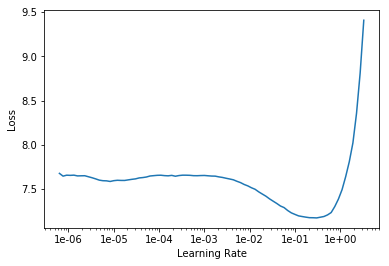

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1, 1e-3, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,6.213605,5.903590,0.193094,02:37


In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


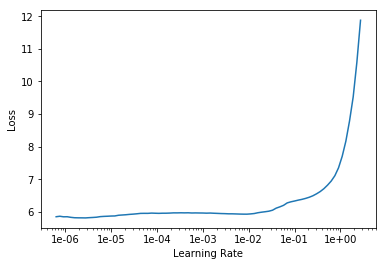

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(10, 1e-4, moms=(0.8,0.7))

In [0]:
learn.save('drugs-sentiment-lm')

In [0]:
TEXT = "I liked "
N_WORDS = 40
N_SENTENCES = 2

In [0]:

print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

In [0]:
learn.save_encoder('drugs-sentiment-enc')

### TextClassifier

In [0]:

learn = text_classifier_learner(data_clas, arch=AWD_LSTM,  drop_mult=0.5)

In [0]:
learn.load_encoder('drugs-sentiment-enc')

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.metrics = [FBeta(beta=1, average='macro')]

In [0]:
learn.fit_one_cycle(1, 1e-4, moms=(0.8, 0.7))

In [0]:
learn.freeze_to(-2)
learn.fit_one_cycle(10, slice(1e-4/(2.6**4),1e-4), moms=(0.8,0.7))